<a href="https://colab.research.google.com/github/abhaymittal2001/Assignments/blob/main/Ass1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
class MPNeuron:
    def __init__(self, threshold, input_types):
        self.threshold = threshold
        self.input_types = input_types

    def compute_output(self, inputs):
        excitatory_sum = 0
        inhibitory_sum = 0

        for i, inp in enumerate(inputs):
            if self.input_types[i] == "excitatory":
                excitatory_sum += inp
            elif self.input_types[i] == "inhibitory":
                inhibitory_sum += inp

        net_input = excitatory_sum - inhibitory_sum

        return 1 if net_input >= self.threshold else 0

# Implementing logic gates
# 1) Implement the AND logic gate for two inputs
def and_gate(input1, input2):
    neuron = MPNeuron(threshold=2, input_types=["excitatory", "excitatory"])
    return neuron.compute_output([input1, input2])
# 2) Implement the OR logic gate for two inputs
def or_gate(input1, input2):
    neuron = MPNeuron(threshold=1, input_types=["excitatory", "excitatory"])
    return neuron.compute_output([input1, input2])
# 3) Implement the not logic gate for two inputs
def not_gate(input1):
    neuron = MPNeuron(threshold=1, input_types=["inhibitory"])
    return neuron.compute_output([input1])
# 4) Implement the nor logic gate for two inputs
def nor_gate(input1, input2):
    neuron = MPNeuron(threshold=0, input_types=["inhibitory", "inhibitory"])
    return neuron.compute_output([input1, input2])

#5) Scenario: Staircase light control
def staircase_light(input1, input2):
    neuron1 = MPNeuron(threshold=1, input_types=["excitatory", "inhibitory"])
    neuron2 = MPNeuron(threshold=1, input_types=["inhibitory", "excitatory"])

    output1 = neuron1.compute_output([input1, input2])
    output2 = neuron2.compute_output([input1, input2])

    return and_gate(output1, not_gate(output2))

# Multi-input version of the gate in part 5
def multi_input_staircase_light(input1, input2, input3, input4):
    neuron1 = MPNeuron(threshold=1, input_types=["excitatory", "inhibitory"])
    neuron2 = MPNeuron(threshold=1, input_types=["inhibitory", "excitatory"])

    output1 = neuron1.compute_output([input1, input2])
    output2 = neuron2.compute_output([input1, input2])

    return and_gate(output1, not_gate(output2))

# Testing the implemented logic gates
print("AND gate (1 AND 0):", and_gate(1, 0))
print("OR gate (1 OR 0):", or_gate(1, 0))
print("NOT gate (NOT 1):", not_gate(1))
print("NOR gate (1 NOR 0):", nor_gate(1, 0))

# Testing the staircase light scenario
print("Staircase Light Control (1, 0):", staircase_light(1, 0))
# 6 XOR gate has been used in part 5
# Testing the multi-input version of the gate in part 5
print("Multi-input Staircase Light (1, 0, 1, 0):", multi_input_staircase_light(1, 0, 1, 0))


def xor_gate(input1, input2):
    # XOR can be represented as (input1 AND NOT input2) OR (NOT input1 AND input2)
    and_neuron1 = MPNeuron(threshold=1, input_types=["excitatory", "inhibitory"])
    and_neuron2 = MPNeuron(threshold=1, input_types=["inhibitory", "excitatory"])
    or_neuron = MPNeuron(threshold=1, input_types=["excitatory", "excitatory"])

    output1 = and_neuron1.compute_output([input1, not_gate(input2)])
    output2 = and_neuron2.compute_output([not_gate(input1), input2])

    return or_neuron.compute_output([output1, output2])

# Testing XOR gate
print("XOR gate (1 XOR 0):", xor_gate(1, 0))
print("XOR gate (1 XOR 1):", xor_gate(1, 1))
print("XOR gate (0 XOR 0):", xor_gate(0, 0))
print("XOR gate (0 XOR 1):", xor_gate(0, 1))

AND gate (1 AND 0): 0
OR gate (1 OR 0): 1
NOT gate (NOT 1): 0
NOR gate (1 NOR 0): 0
Staircase Light Control (1, 0): 0
Multi-input Staircase Light (1, 0, 1, 0): 0
XOR gate (1 XOR 0): 1
XOR gate (1 XOR 1): 1
XOR gate (0 XOR 0): 0
XOR gate (0 XOR 1): 1


Shape of an individual image: (28, 28)


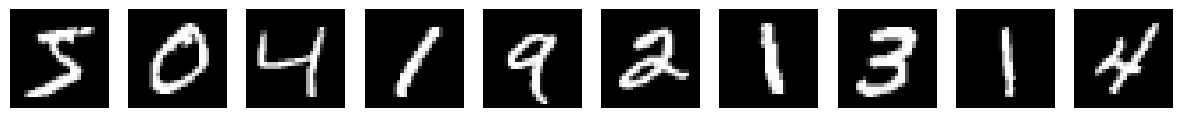

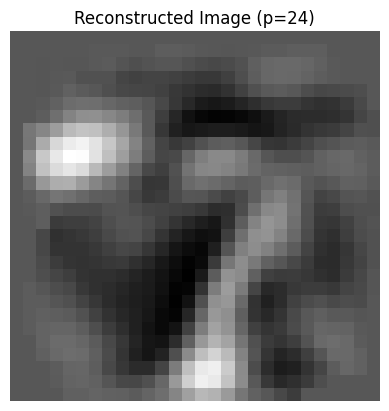

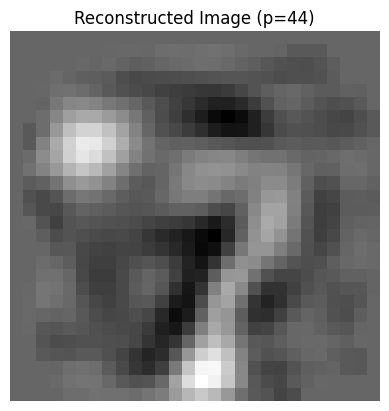

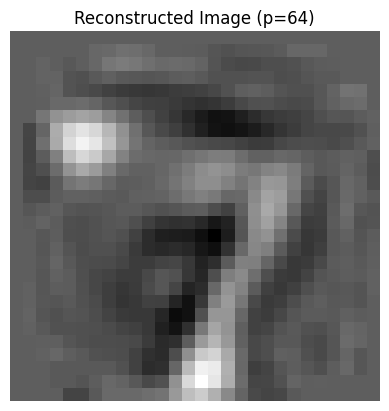

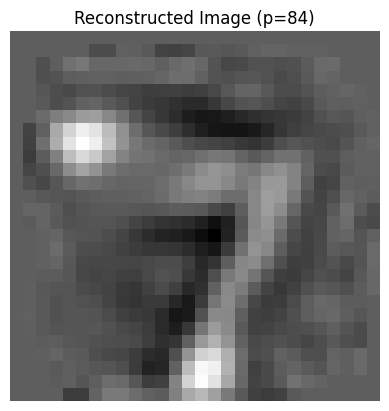

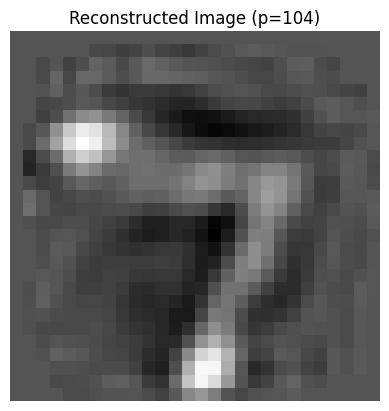

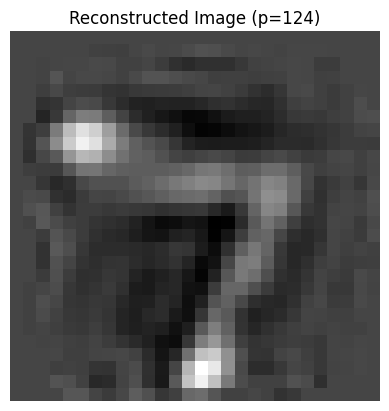

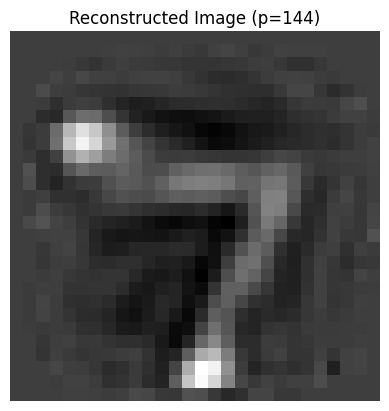

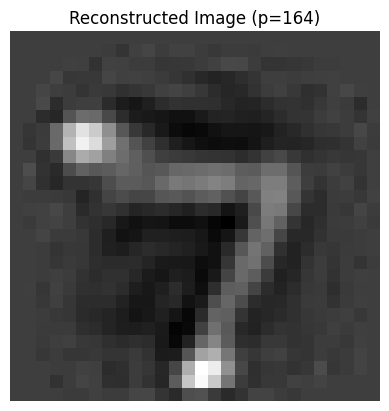

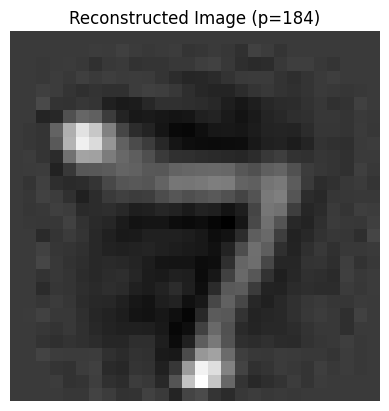

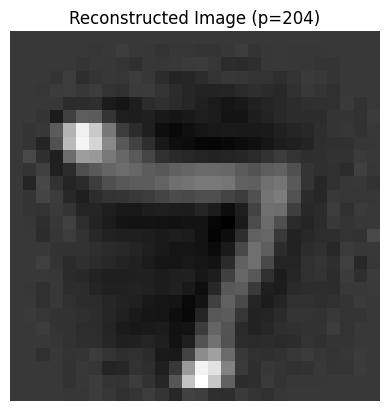

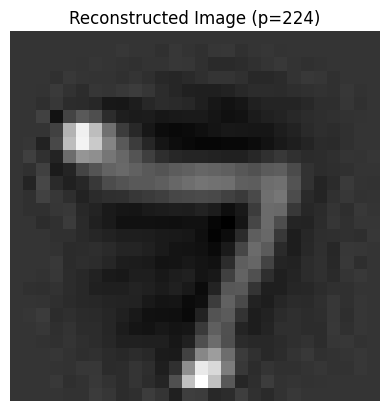

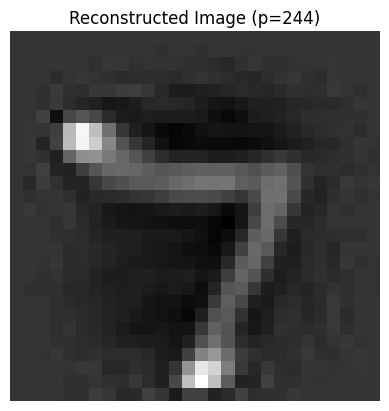

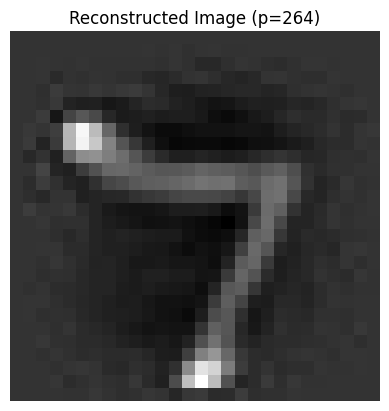

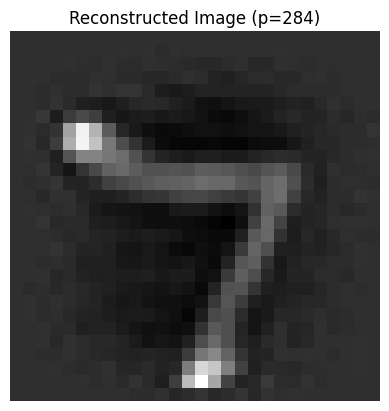

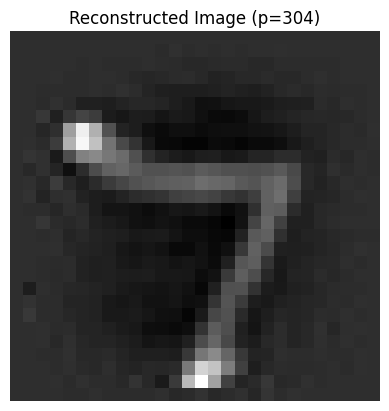

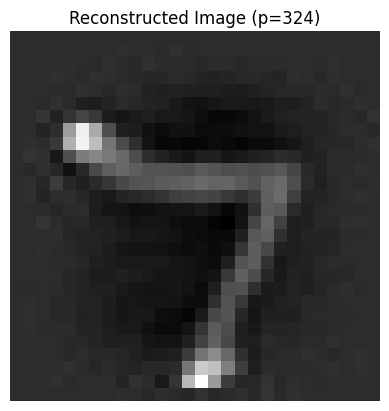

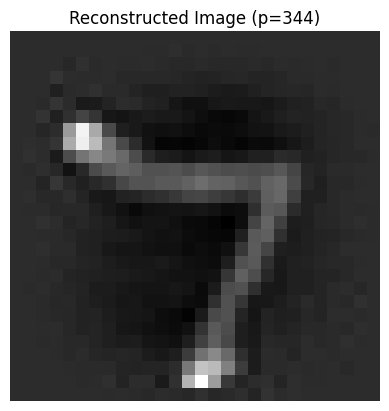

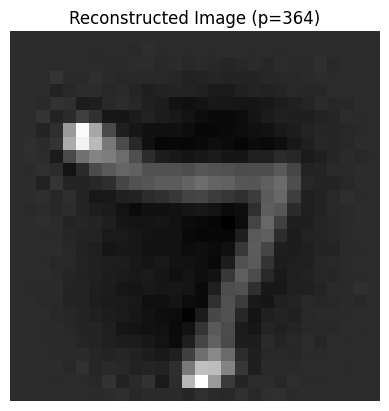

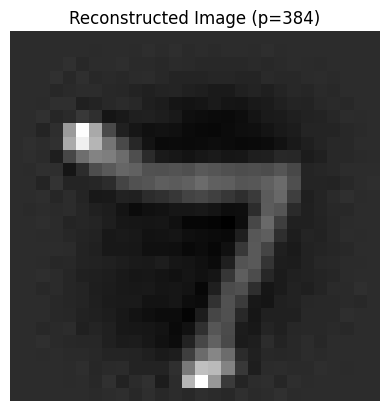

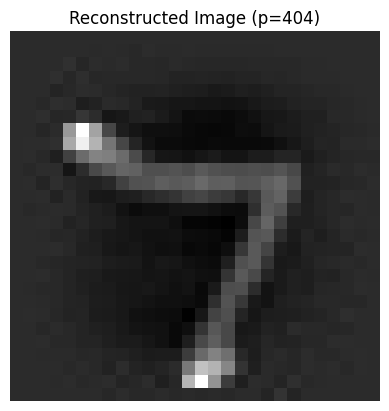

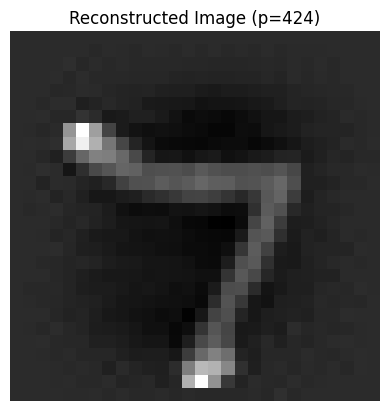

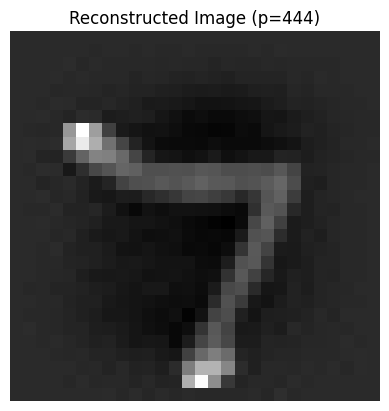

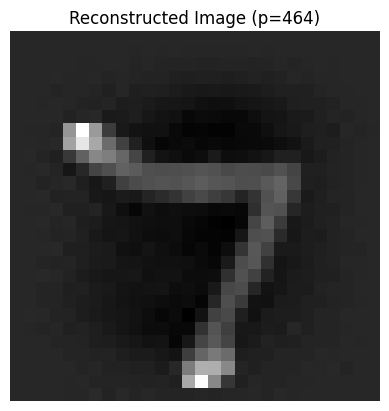

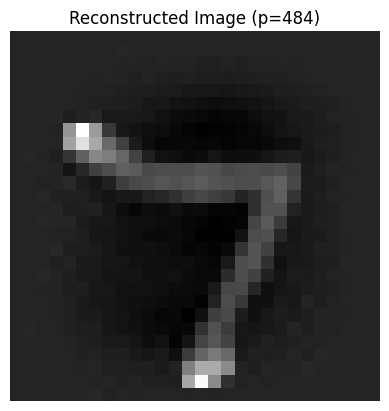

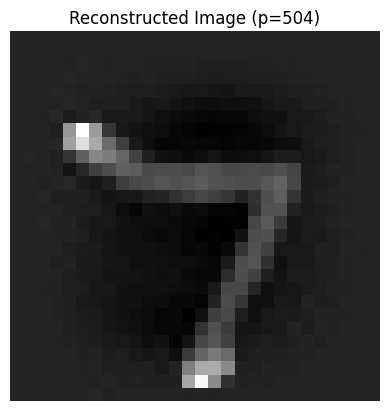

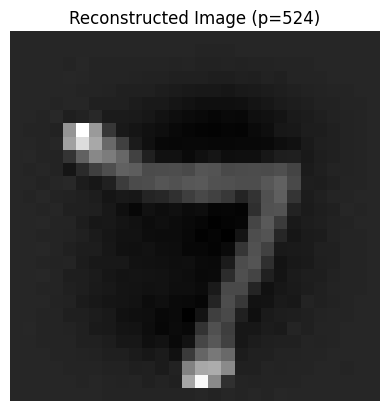

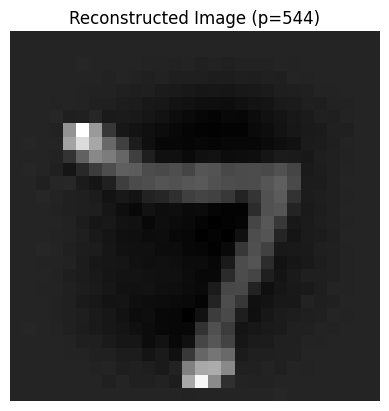

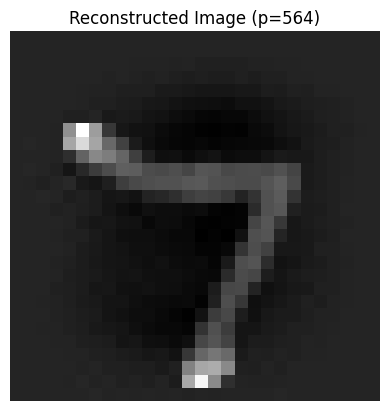

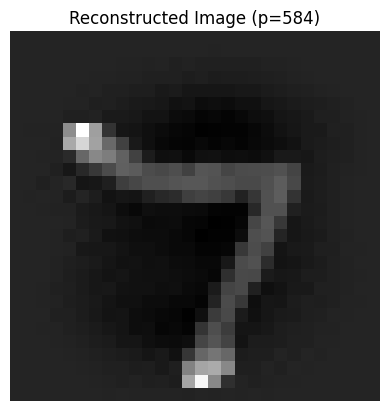

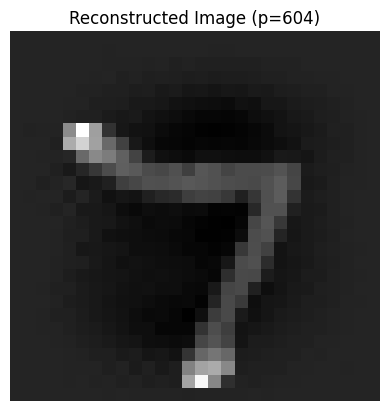

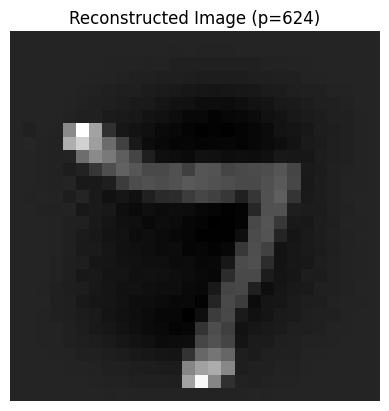

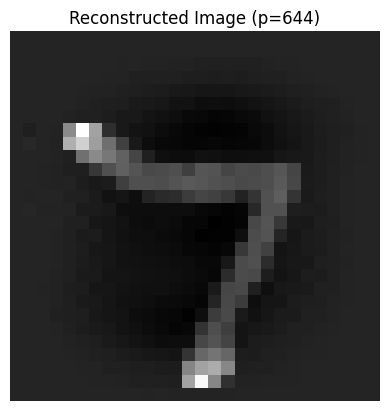

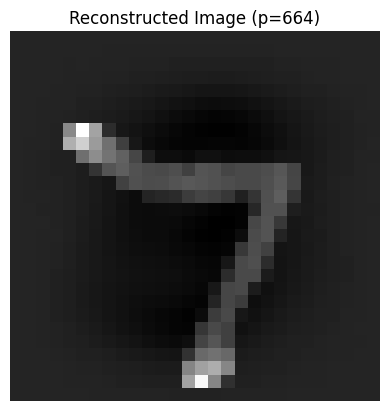

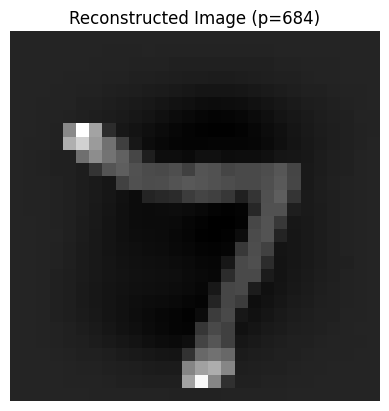

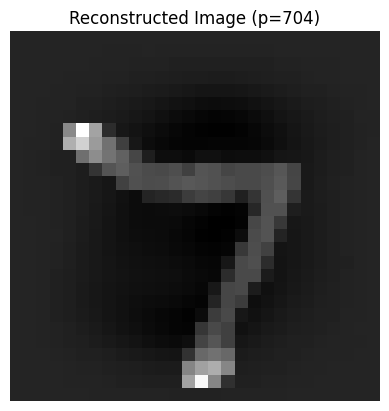

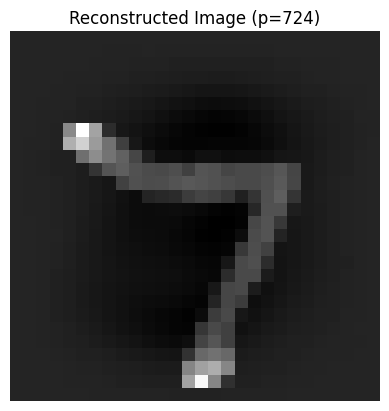

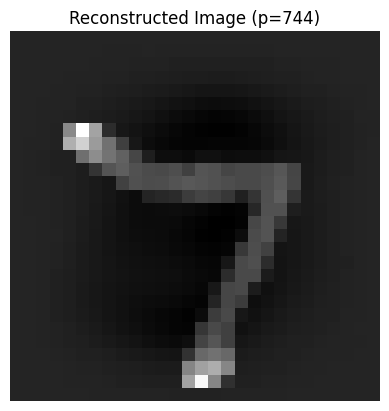

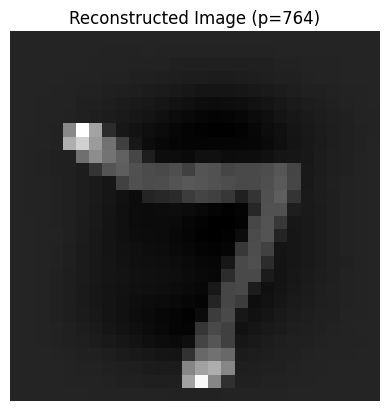

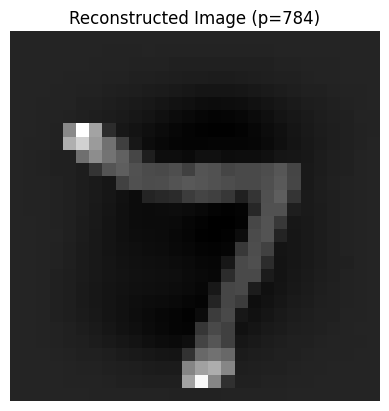

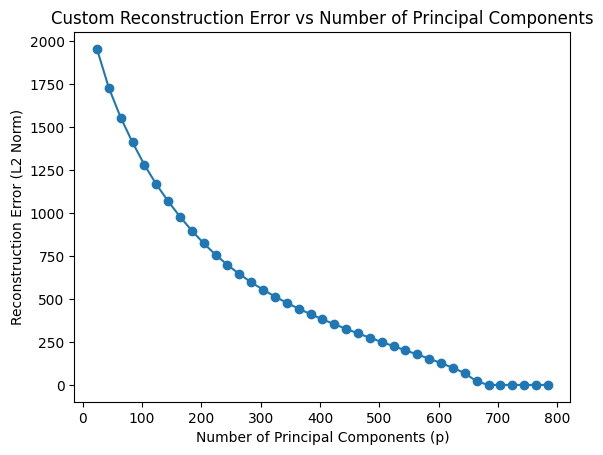

In [ ]:
# Import necessary libraries
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# 1. Download the dataset and visualize the digits
(train_images, train_labels), (_, _) = tf.keras.datasets.mnist.load_data()
print("Shape of an individual image:", train_images[0].shape)

# Visualize the digits
fig, axes = plt.subplots(1, 10, figsize=(15, 3))
for i in range(10):
    axes[i].imshow(train_images[i], cmap='gray')
    axes[i].axis('off')
plt.show()

# 2. Randomly choose 10000 images and flatten them
np.random.seed(42)
chosen_indices = np.random.choice(len(train_images), size=10000, replace=False)
selected_images = train_images[chosen_indices]
flattened_images = selected_images.reshape((10000, -1))

# 3. Implementation of standardize function
def custom_standardize(data_matrix):
    mean_vals = np.mean(data_matrix, axis=0)
    std_devs = np.std(data_matrix, axis=0)
    std_devs[std_devs == 0] = 1  # Replace zero with 1 to avoid division by zero
    standardized_matrix = (data_matrix - mean_vals) / std_devs
    return standardized_matrix

# 4. Standardize the data and find the projection matrix P (Principal Components)
standardized_data = custom_standardize(flattened_images)
standardized_data_no_nan = np.nan_to_num(standardized_data, nan=0)  # Replace nan values with zero

# 4. Compute the covariance matrix
def calculate_custom_covariance_matrix(data_matrix):
    covariance_matrix = np.cov(data_matrix, rowvar=False)
    return covariance_matrix

covariance_matrix = calculate_custom_covariance_matrix(standardized_data_no_nan)

def retrieve_custom_eigenvalues_and_vectors(cov_matrix):
    eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)
    return eigenvalues, eigenvectors

eigenvalues, eigenvectors = retrieve_custom_eigenvalues_and_vectors(covariance_matrix)
sorted_eigen_vectors = eigenvectors[:, ::-1]  # Sort eigenvectors in descending order

# 5. Compute reconstruction errors with varying number of principal components
custom_reconstruction_errors = []

for num_components in range(24, 785, 20):
    selected_components = sorted_eigen_vectors[:, :num_components]
    reduced_dimension_data = np.dot(standardized_data_no_nan, selected_components)
    reconstructed_data = np.dot(reduced_dimension_data, selected_components.T)
    error_norm = np.linalg.norm(standardized_data_no_nan - reconstructed_data, ord='fro')
    custom_reconstruction_errors.append(error_norm)

    # Visualize each reconstruction
    first_reconstructed_image = reconstructed_data[0].reshape(selected_images[0].shape)
    plt.figure()
    plt.imshow(first_reconstructed_image, cmap='gray')
    plt.title(f'Reconstructed Image (p={num_components})')
    plt.axis('off')
    plt.show()

# 5. Plot the reconstruction error vs the number of principal components
plt.figure()
plt.plot(range(24, 785, 20), custom_reconstruction_errors, marker='o')
plt.title('Custom Reconstruction Error vs Number of Principal Components')
plt.xlabel('Number of Principal Components (p)')
plt.ylabel('Reconstruction Error (L2 Norm)')
plt.show()


In [ ]:
# # Observation:Reconstruction Error vs. Number of Principal Components:

# The plot of reconstruction error against the number of principal components illustrates the trade-off between compression and reconstruction accuracy.
# A sharp decrease in error is observed initially, with diminishing returns as more components are included.
# The plot provides insights into how the choice of principal components affects the quality of image reconstruction.
# It demonstrates the potential for dimensionality reduction and compression using PCA while preserving the essential features of the data.